In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler 
from  sklearn.model_selection import train_test_split


# Inspecting the Dataset

In [2]:
train=pd.read_csv("/kaggle/input/playground-series-s5e10/train.csv")
test=pd.read_csv("/kaggle/input/playground-series-s5e10/test.csv")

In [3]:
display(train.head())
test.head()

,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents,accident_risk
0,0,urban,2,0.06,35,daylight,rainy,False,True,afternoon,False,True,1,0.13
1,1,urban,4,0.99,35,daylight,clear,True,False,evening,True,True,0,0.35
2,2,rural,4,0.63,70,dim,clear,False,True,morning,True,False,2,0.30
3,3,highway,4,0.07,35,dim,rainy,True,True,morning,False,False,1,0.21
4,4,rural,1,0.58,60,daylight,foggy,False,False,evening,True,False,1,0.56


,id,road_type,num_lanes,curvature,speed_limit,lighting,weather,road_signs_present,public_road,time_of_day,holiday,school_season,num_reported_accidents
0,517754,highway,2,0.34,45,night,clear,True,True,afternoon,True,True,1
1,517755,urban,3,0.04,45,dim,foggy,True,False,afternoon,True,False,0
2,517756,urban,2,0.59,35,dim,clear,True,False,afternoon,True,True,1
3,517757,rural,4,0.95,35,daylight,rainy,False,False,afternoon,False,False,2
4,517758,highway,2,0.86,35,daylight,clear,True,False,evening,False,True,3


# Getting Insights about the Dataset

In [4]:
print("\n Train\n")
train.info()
print("\n Test\n")
test.info()


 Train

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517754 entries, 0 to 517753
Data columns (total 14 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      517754 non-null  int64  
 1   road_type               517754 non-null  object 
 2   num_lanes               517754 non-null  int64  
 3   curvature               517754 non-null  float64
 4   speed_limit             517754 non-null  int64  
 5   lighting                517754 non-null  object 
 6   weather                 517754 non-null  object 
 7   road_signs_present      517754 non-null  bool   
 8   public_road             517754 non-null  bool   
 9   time_of_day             517754 non-null  object 
 10  holiday                 517754 non-null  bool   
 11  school_season           517754 non-null  bool   
 12  num_reported_accidents  517754 non-null  int64  
 13  accident_risk           517754 non-null  float64
dtypes: bool(4),

In [5]:
print("\n Train\n")
display(train.describe())
print("\n Test\n")
display(test.describe())


 Train



,id,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk
count,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000,517754.000000
mean,258876.500000,2.491511,0.488719,46.112575,1.187970,0.352377
std,149462.849974,1.120434,0.272563,15.788521,0.895961,0.166417
min,0.000000,1.000000,0.000000,25.000000,0.000000,0.000000
25%,129438.250000,1.000000,0.260000,35.000000,1.000000,0.230000
50%,258876.500000,2.000000,0.510000,45.000000,1.000000,0.340000
75%,388314.750000,3.000000,0.710000,60.000000,2.000000,0.460000
max,517753.000000,4.000000,1.000000,70.000000,7.000000,1.000000



 Test



,id,num_lanes,curvature,speed_limit,num_reported_accidents
count,172585.000000,172585.000000,172585.000000,172585.000000,172585.000000
mean,604046.000000,2.494046,0.487263,46.102761,1.186059
std,49821.142441,1.119148,0.272343,15.787077,0.897161
min,517754.000000,1.000000,0.000000,25.000000,0.000000
25%,560900.000000,1.000000,0.260000,35.000000,1.000000
50%,604046.000000,2.000000,0.510000,45.000000,1.000000
75%,647192.000000,3.000000,0.710000,60.000000,2.000000
max,690338.000000,4.000000,1.000000,70.000000,7.000000


In [6]:
print(train.shape)
print(test.shape)

(517754, 14)
(172585, 13)


# Handling Missing values

In [7]:
print("\ntrain\n")
print(train.isnull().sum())
print("\ntest\n")
print(test.isnull().sum())


train

id                        0
road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
accident_risk             0
dtype: int64

test

id                        0
road_type                 0
num_lanes                 0
curvature                 0
speed_limit               0
lighting                  0
weather                   0
road_signs_present        0
public_road               0
time_of_day               0
holiday                   0
school_season             0
num_reported_accidents    0
dtype: int64


The Dataset has no missing values

# Checking Duplication

In [8]:
print(train.duplicated().sum())

0


In [9]:
print(test.duplicated().sum())

0


# Data Visulatization

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


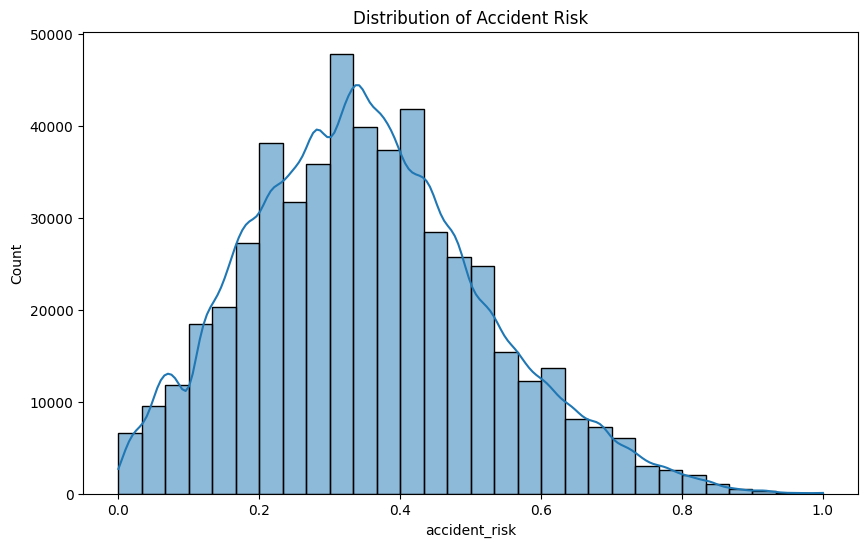

In [10]:
plt.figure(figsize=(10,6))
sns.histplot(train['accident_risk'],bins=30,kde=True)
plt.title('Distribution of Accident Risk')
plt.show()

In [12]:
#Spliting the Data's into two types such as Numeric as num_col and Words as cat_col
num_col=("num_lanes","curvature","speed_limit","num_reported_accidents")
cat_col=("road_type","lighting","weather","road_signs_present","public_road","time_of_day","holiday","school_season")

# Univariate Analysis


Look into Numerical Features

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

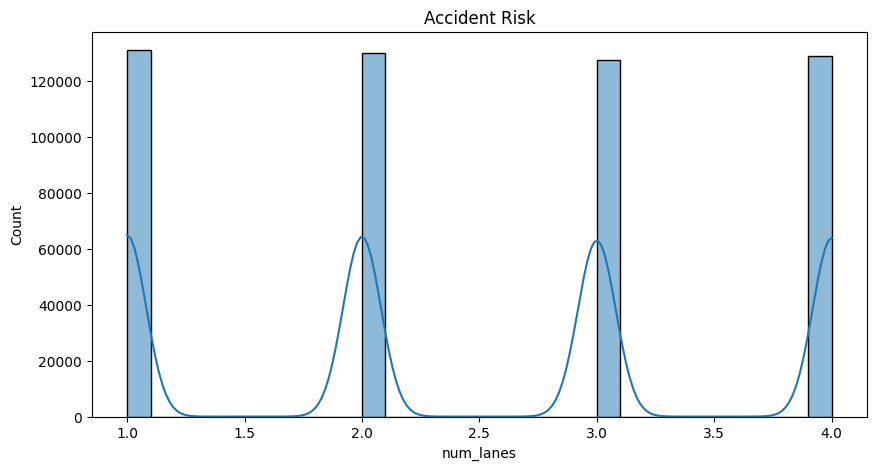

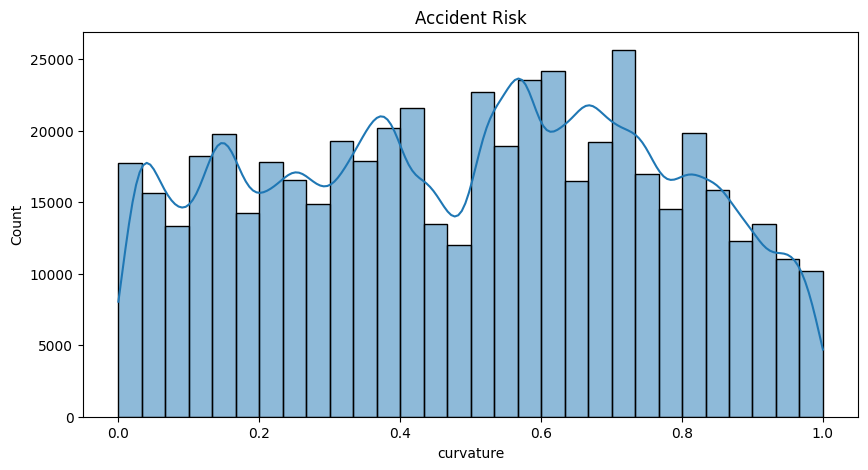

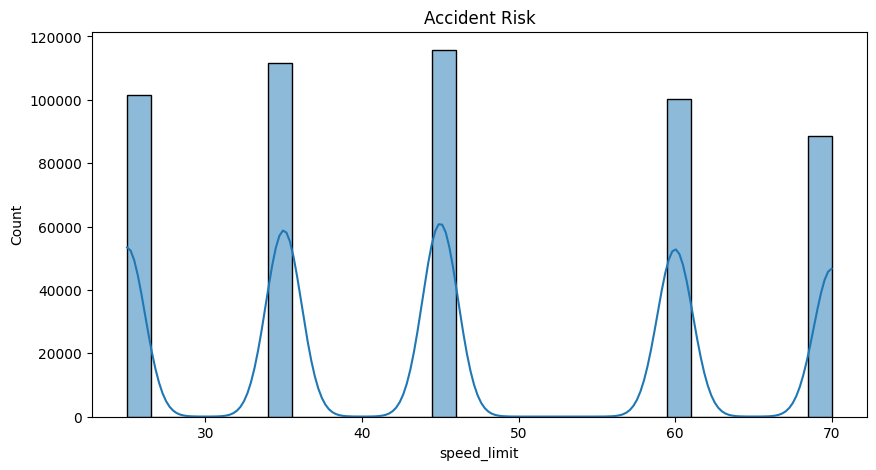

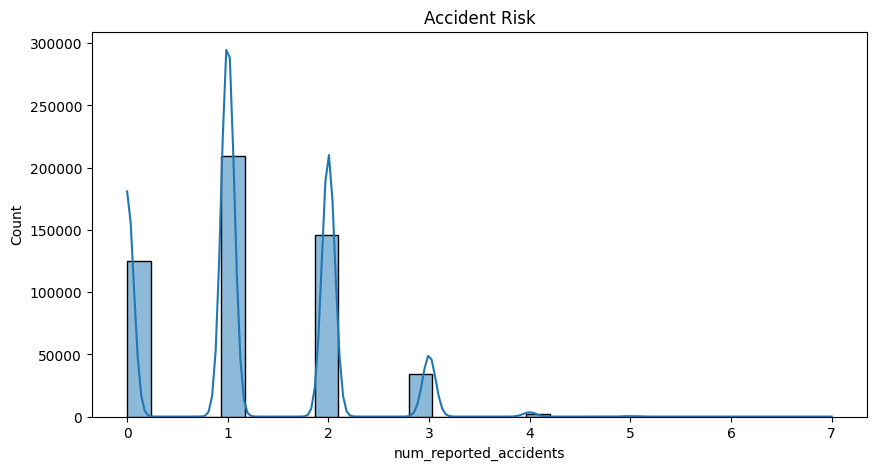

In [13]:
for col in num_col:
    plt.figure(figsize=(10,5))
    plt.title('Accident Risk')
    sns.histplot(train[col],bins=30,kde=True)
    

Look into Categorical Features

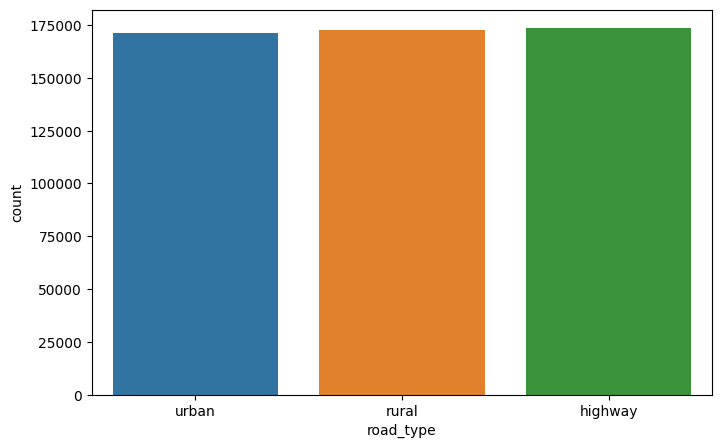

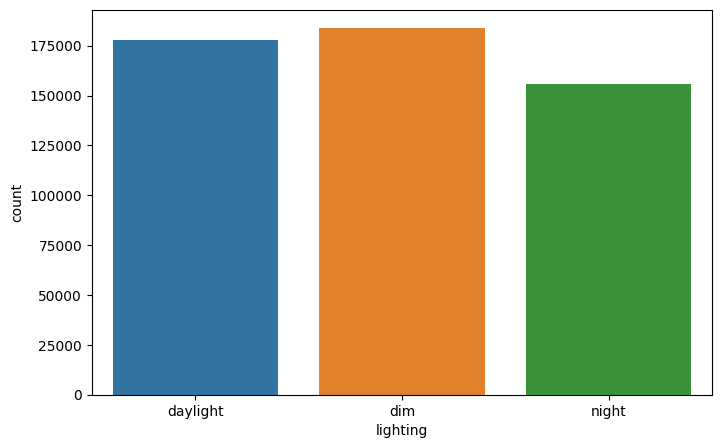

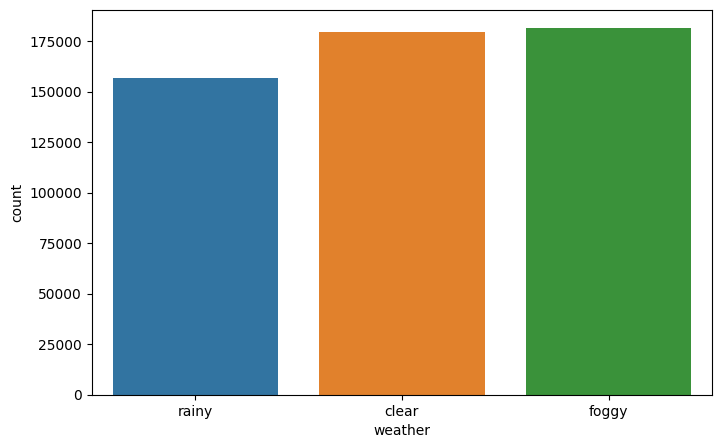

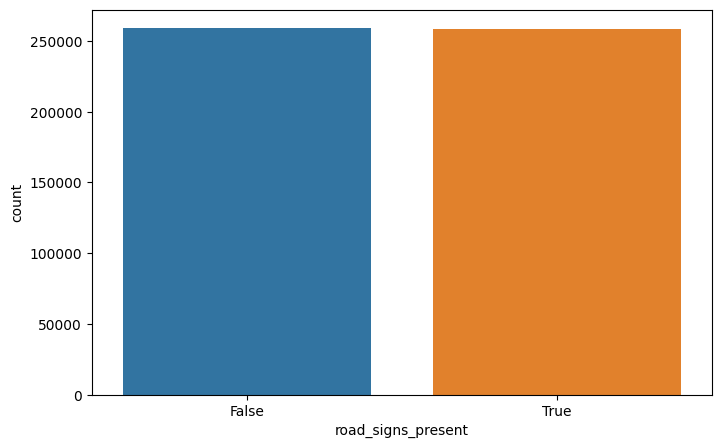

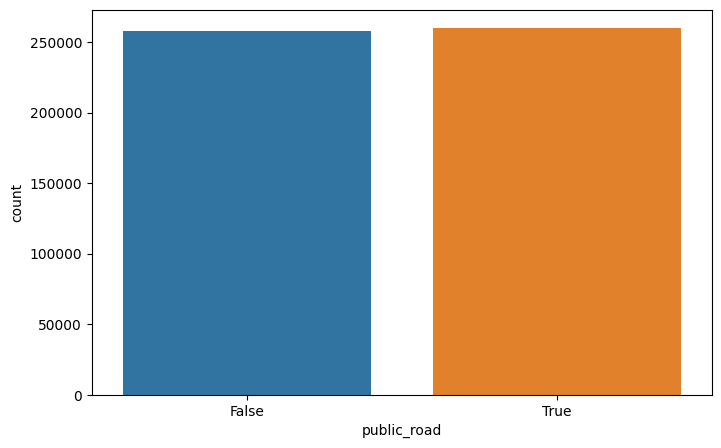

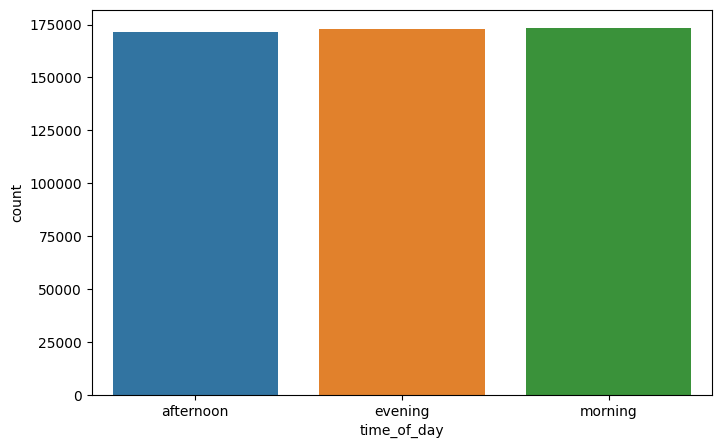

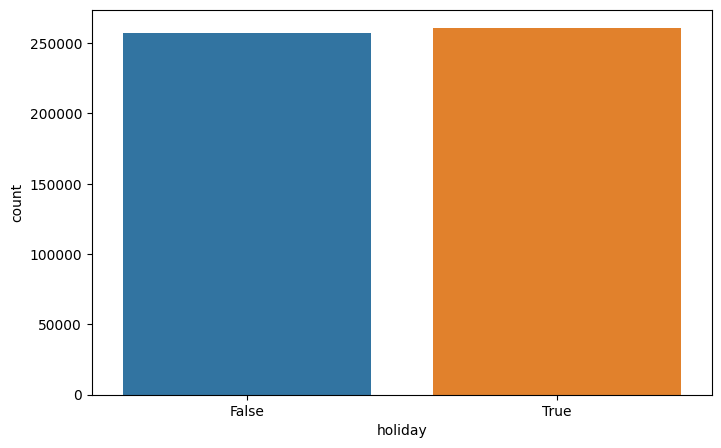

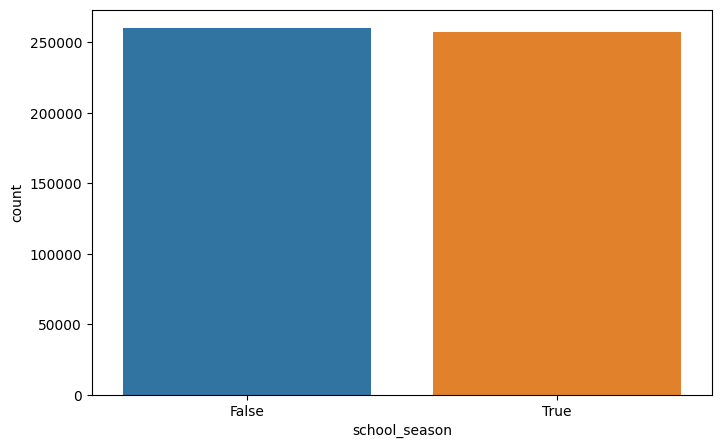

In [14]:
for col in cat_col:
 plt.figure(figsize=(8,5))
 sns.countplot(x=col,data=train)
 plt.show()

# Feature Correlation Analysis

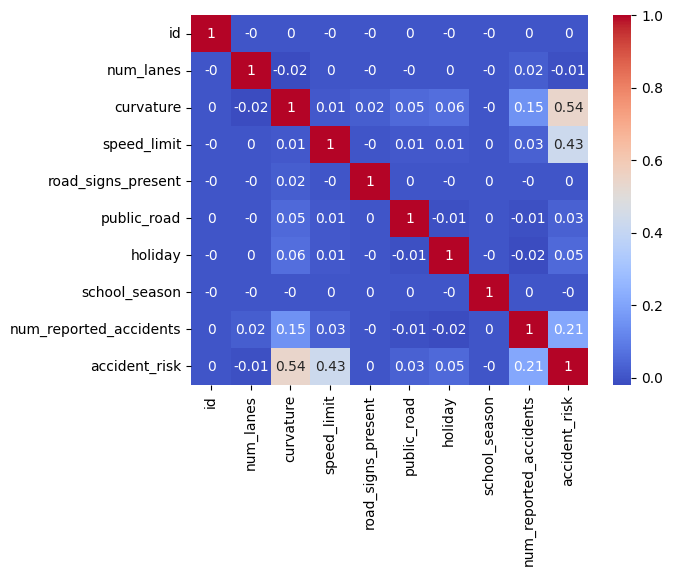

In [15]:
sns.heatmap(train.corr(numeric_only=True).round(2),annot=True,cmap='coolwarm')
plt.show()

# Encoding

Converting Categorical Data into Numerical Form

In [16]:
#Looking on dtypes to know which type to use
train.dtypes

id                          int64
road_type                  object
num_lanes                   int64
curvature                 float64
speed_limit                 int64
lighting                   object
weather                    object
road_signs_present           bool
public_road                  bool
time_of_day                object
holiday                      bool
school_season                bool
num_reported_accidents      int64
accident_risk             float64
dtype: object

In [17]:
#Creating one new dataframe
cat_col = train.select_dtypes(include=["bool","object"]).columns.tolist()
# Viewing the dataframe
cat_col

['road_type',
 'lighting',
 'weather',
 'road_signs_present',
 'public_road',
 'time_of_day',
 'holiday',
 'school_season']

Encoding of Train Feature

In [18]:

#  Create encoder
encoder = OneHotEncoder(sparse=False, drop="first")

#  Fit + transform categorical data
encoded = encoder.fit_transform(train[cat_col])

#  Get new column names
encoded_cols = encoder.get_feature_names_out(cat_col)

#  Convert to dataframe
encoded_df = pd.DataFrame(encoded, columns=encoded_cols, index=train.index)

# Drop original categorical columns and join new ones
train_encoded = train.drop(columns=cat_col).join(encoded_df)

display(train_encoded.head())

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,id,num_lanes,curvature,speed_limit,num_reported_accidents,accident_risk,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,road_signs_present_True,public_road_True,time_of_day_evening,time_of_day_morning,holiday_True,school_season_True
0,0,2,0.06,35,1,0.13,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,4,0.99,35,0,0.35,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0
2,2,4,0.63,70,2,0.30,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
3,3,4,0.07,35,1,0.21,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
4,4,1,0.58,60,1,0.56,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


Encoding of Test Feature

In [19]:
#  Create encoder
encoder = OneHotEncoder(sparse=False, drop="first")

#  Fit + transform categorical data
encoded = encoder.fit_transform(test[cat_col])

#  Get new column names
encoded_cols = encoder.get_feature_names_out(cat_col)

#  Convert to dataframe
encoded_df = pd.DataFrame(encoded, columns=encoded_cols, index=test.index)

# Drop original categorical columns and join new ones
test_encoded = test.drop(columns=cat_col).join(encoded_df)

display(test_encoded.head())

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,id,num_lanes,curvature,speed_limit,num_reported_accidents,road_type_rural,road_type_urban,lighting_dim,lighting_night,weather_foggy,weather_rainy,road_signs_present_True,public_road_True,time_of_day_evening,time_of_day_morning,holiday_True,school_season_True
0,517754,2,0.34,45,1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0
1,517755,3,0.04,45,0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,517756,2,0.59,35,1,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,517757,4,0.95,35,2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,517758,2,0.86,35,3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


# Handling Outliers

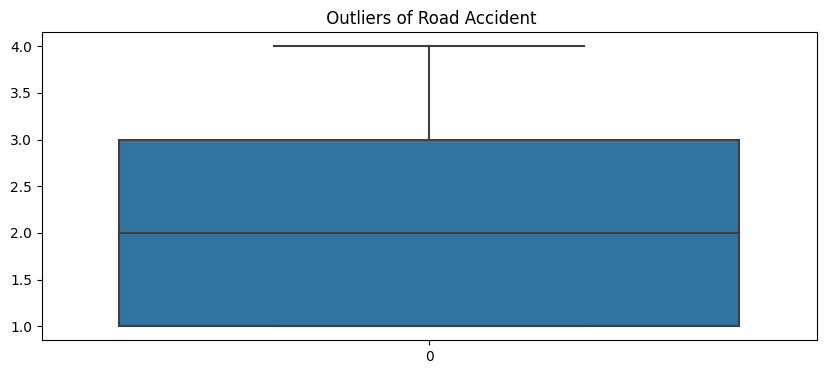

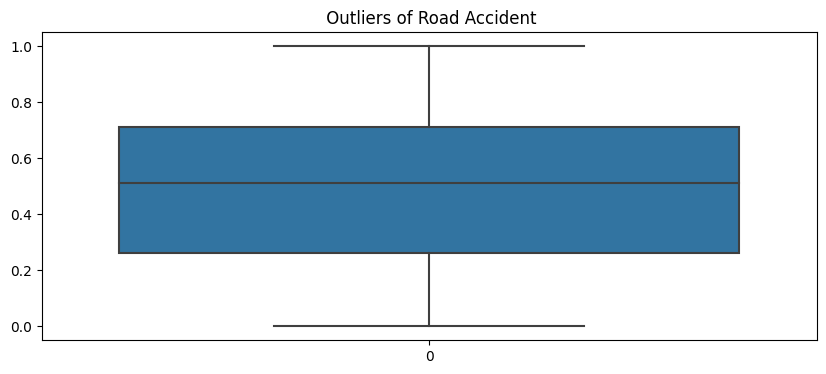

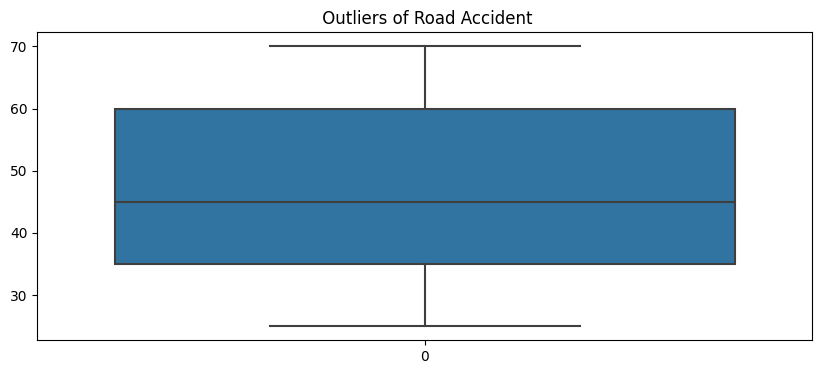

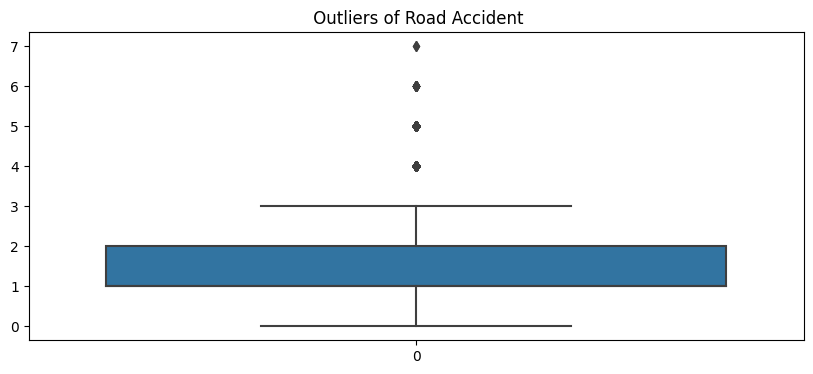

In [20]:
for col in num_col:
 plt.figure(figsize=(10,4))
 sns.boxplot(train[col])
 plt.title(" Outliers of Road Accident")
 plt.show()

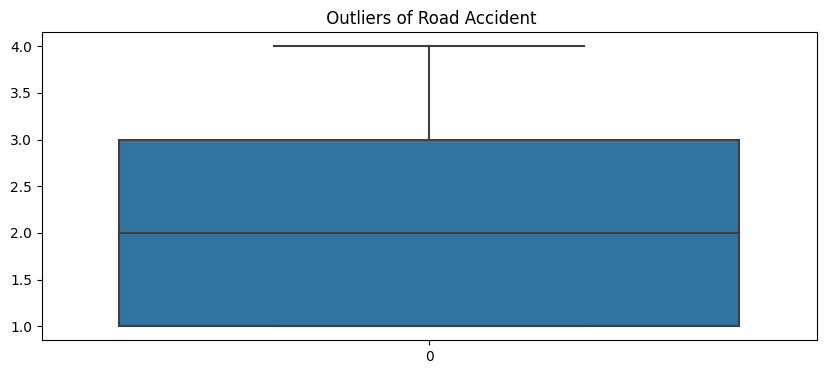

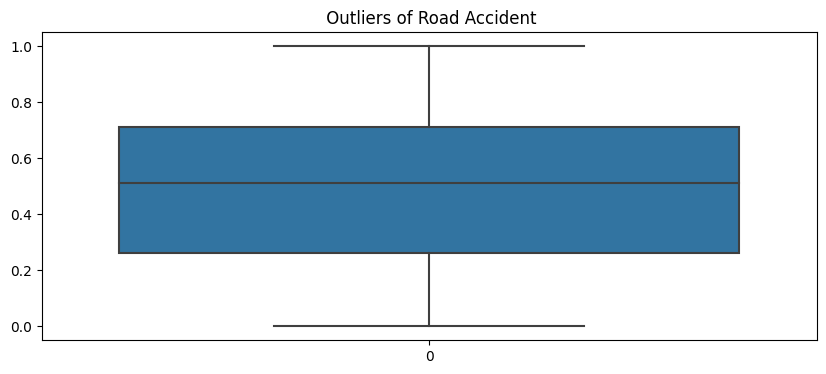

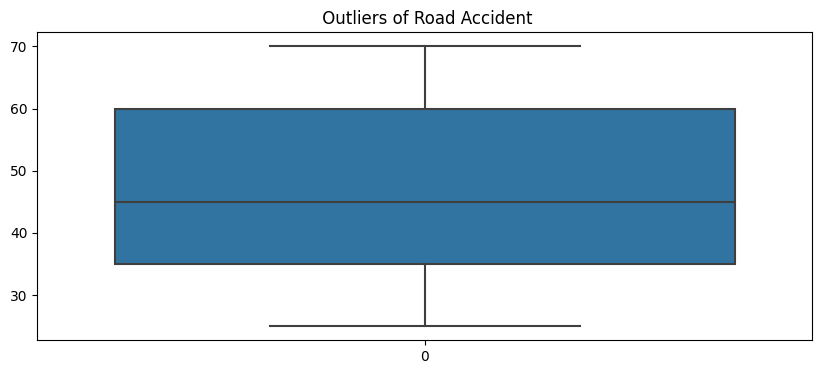

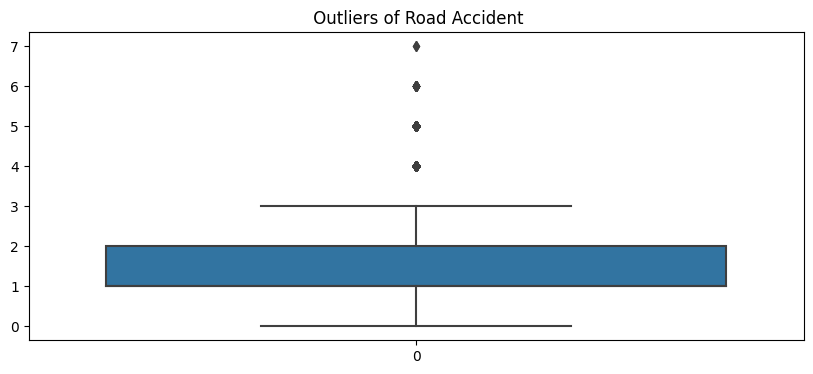

In [21]:
num_cols=("num_lanes","curvature","speed_limit","num_reported_accidents")
for col in num_cols:
 plt.figure(figsize=(10,4))
 sns.boxplot(train[col])
 plt.title(" Outliers of Road Accident")
 plt.show()

#  Scaling Data Using Standardization

In [22]:
numerical_cols = ["num_lanes","curvature","speed_limit","num_reported_accidents","accident_risk"] # numerical features
scaler = StandardScaler()
train_encoded[numerical_cols] = scaler.fit_transform(train_encoded[numerical_cols])
#train[numerical_cols] = scaler.fit_transform(train[numerical_cols])


# Validating the Model Performance

In [23]:
X = train_encoded.drop(['id','accident_risk'], axis=1)
y = train_encoded['accident_risk']
X_test =test_encoded.drop(['id'], axis=1) 


print("X shape:", X.shape)
print("y shape:", y.shape)
print(X_test.shape)

X shape: (517754, 16)
y shape: (517754,)
(172585, 16)


In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)


X_train shape: (414203, 16)
X_val shape: (103551, 16)
y_train shape: (414203,)
y_val shape: (103551,)


# Building the Machine Learning Model

In [ ]:
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
# Initialize the CatBoost model
catboost = CatBoostRegressor(random_state=42, verbose=0) # verbose=0 to suppress output during training

# Train the CatBoost model
print("Training CatBoost model...")
catboost.fit(X_train, y_train)

# Evaluate the CatBoost model
y_pred_catboost = catboost.predict(X_val)
rmse_catboost = mean_squared_error(y_val, y_pred_catboost)**0.5
print(f"CatBoost RMSE on validation data: {rmse_catboost}")

In [ ]:
# Predicting the Test data using the Trained Model
catboost_test_pred = catboost.predict(X_test)


In [ ]:
submission_df = pd.DataFrame({'id': test['id'], 'accident_risk': catboost_test_pred})
submission_df.to_csv('submission.csv', index=False)

print("Submission file created successfully!")


In [ ]:
submission_df = pd.DataFrame({'id': test['id'], 'accident_risk': catboost_test_pred})
submission_df.to_csv('submission.csv', index=False)

print("Submission file created successfully!")


In [ ]:
import optuna
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 500, 3000),
        'learning_rate': trial.suggest_float('learning_rate', 0.005, 0.1, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 31, 512),
        'max_depth': trial.suggest_int('max_depth', -1, 12),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-3, 10.0, log=True),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-3, 10.0, log=True),
        'random_state': 42,
        'n_jobs': -1
    }
    model = LGBMRegressor(**params)
    model.fit(X_train, y_train)
    preds = model.predict(X_val)
    rmse = mean_squared_error(y_val, preds, squared=False)
    return rmse

# Run Optuna optimization
study = optuna.create_study(direction="minimize")
study.optimize(objective, n_trials=50)

print("Best RMSE:", study.best_value)
print("Best params:", study.best_params)


In [ ]:
import pandas as pd

# Concatenate back train + val into full dataset
X_full = pd.concat([X_train, X_val], axis=0)
y_full = pd.concat([y_train, y_val], axis=0)


In [ ]:
# 1. Get best params from Optuna
best_params = study.best_params

# 2. Retrain on full train data (combine train+val)
best_model = LGBMRegressor(**best_params, random_state=42, n_jobs=-1)

best_model.fit(X_full, y_full, eval_metric="rmse")

# 3. Predict on X_test
y_test_pred = best_model.predict(X_test)

print("Test predictions:", y_test_pred[:10])  # show first 10 predictions


In [ ]:
# Example using LGBM predictions:
submission_df = pd.DataFrame({'id': test['id'], 'accident_risk':y_test_pred})
# submission_df = pd.DataFrame({'id': test_df['id'], 'accident_risk': averaged_predictions})


# Save the submission file
submission_df.to_csv('submissionb.csv', index=False)

print("Submission file created successfully!")
